<a href="https://colab.research.google.com/github/linashmyak/MLL/blob/main/ML3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Метод K блиайших соседей

## Цель работы

Изучить работу класса KNeighborsClassifier библиотеки Scikit-Learn, реализующего метод K ближайших соседей для классификации.

## Содержание работы

- Загрузить датасет "Ирисы" и выбрать в обучающую выборку только первый и третий столбцы в качестве признаков.
- Проведите минимаксную нормализацию данных.
- Посроить модель классификации по методу ближайших соседей с k=3 и оценить эффективность этой модели.
- Создать новое наблюдение, шкалировать его и сделать предсказание на нём. Вывести расстояния до трёх ближайших соседей. Вывести индексы и координаты трёх ближайших соседей. Визуализировать их.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


iris = load_iris()
features = iris.data

data = pd.DataFrame(features, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X = data.iloc[:, [0, 2]]
y = iris.target
X.shape, y.shape

((150, 2), (150,))

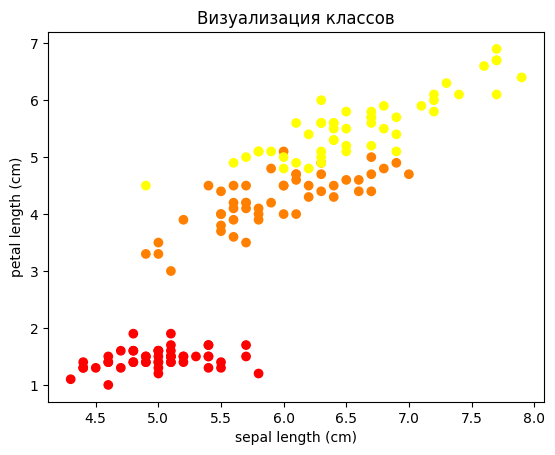

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.title("Визуализация классов")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

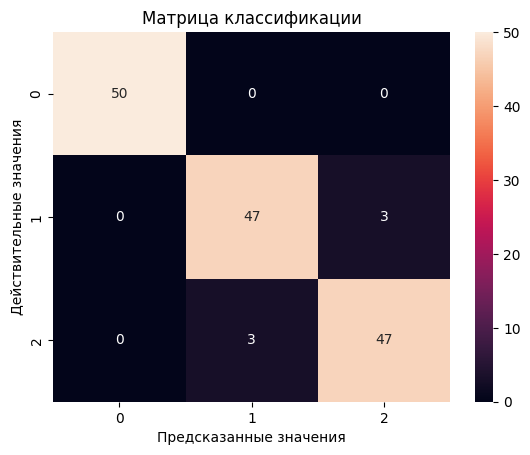

In [ ]:
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [ ]:
print(classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [ ]:
X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

In [ ]:
XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


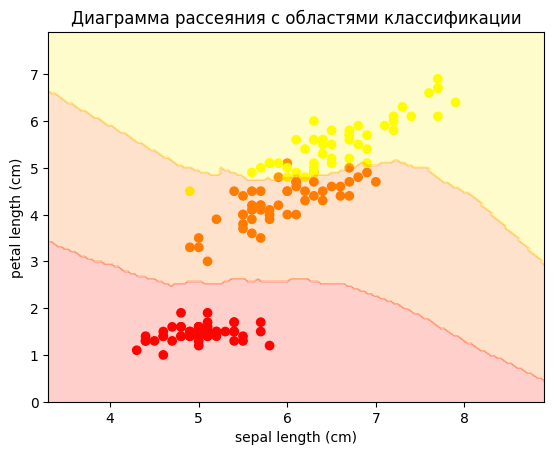

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

In [ ]:
observation_new = [[5.5, 5]]

In [ ]:
observation_new_scaled = scaler.transform(observation_new)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
knn.predict(observation_new_scaled)

array([2])

In [ ]:
knn.predict_proba(observation_new_scaled)

array([[0., 0., 1.]])

In [ ]:
distances, indices = knn.kneighbors(observation_new_scaled)

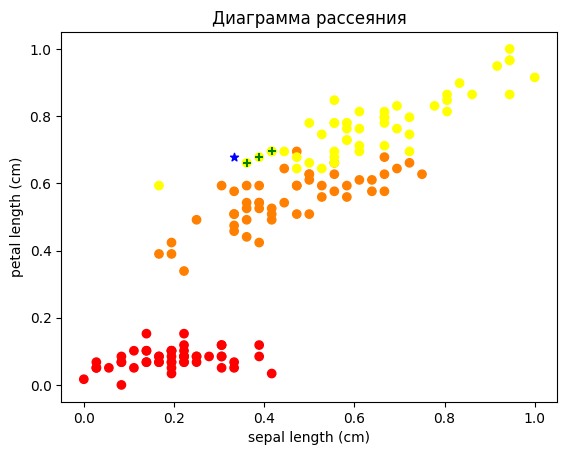

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

## Задания для самостоятельного выполнения

- Постройте последний график методических указаний в исходном пространстве признаков.
- Попробуйте обучить модель с другим значением k. Визуализируйте области классификации и сравните эффективности модели.
- Подвигайте новое наблюдение в последнем пункте методических указаний. Сдвиньте его за пределы области определения выборки. Как меняется нормализованное значение?
- Поэкспериментируйте с разными метриками расстояния. Визуализируйте ближайших соседей нового объекта при разных метриках расстояния.
- Обучите модель на полном датасете. Сравните ее эффективность с описанной в методических указаниях. Попробуйте разные значения k.
- Попробуйте в модели на полном датасете взвешенный алгоритм (аргумент weights объекта KNeighborsClassifier). Сравние его точность с равномерным вариантом.
- Постройте график точности (accuracy) модели в зависимости от значения k. Сделайте вывод.
- Выберите датасет и постройте регрессию при помощи метода ближайших соседей.

## Постройте последний график методических указаний в исходном пространстве признаков.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


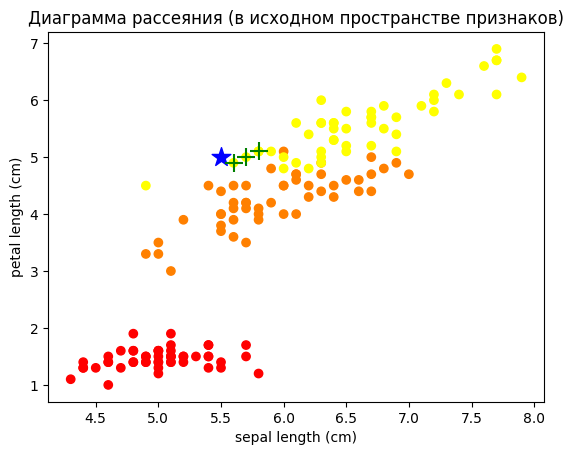

In [ ]:

observation_new = [[5.5, 5]]

# Найдём ближайших соседей в масштабированном пространстве,но отобразим их в исходном
observation_new_scaled = scaler.transform(observation_new)
distances, indices = knn.kneighbors(observation_new_scaled)

neighbor_indices = indices[0]

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn', label='Данные')

# новое наблюдение
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b', s=200, label='Новое наблюдение')

# Нарисуем ближайших соседей в ИСХОДНОМ пространстве
for idx in neighbor_indices:
    plt.scatter(X.iloc[idx, 0], X.iloc[idx, 1], marker='+', color='g', s=150, label='Соседи' if idx == neighbor_indices[0] else "")

plt.title("Диаграмма рассеяния (в исходном пространстве признаков)")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()


## Попробуйте обучить модель с другим значением k. Визуализируйте области классификации и сравните эффективности модели.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


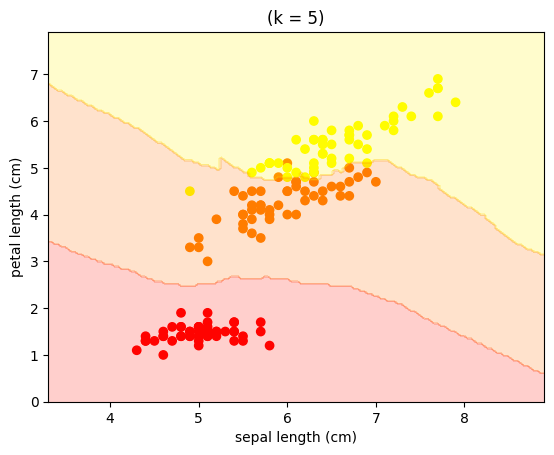

Матрица классиф:


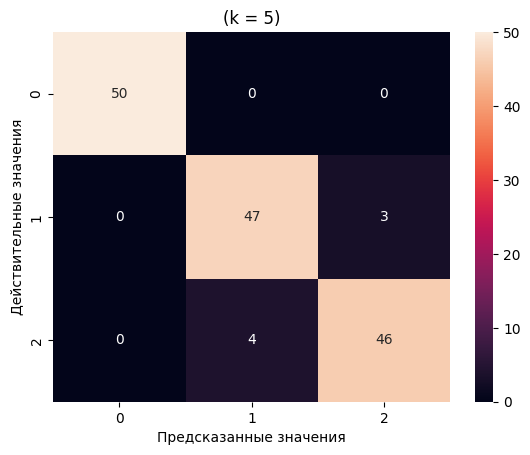

Отчёт о классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.94      0.93        50
           2       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [ ]:
# с другим значением k
knn_new = KNeighborsClassifier(n_neighbors=5)

X_scaled_new = scaler.fit_transform(X)
knn_new.fit(X_scaled_new, y)


XX_scaled = scaler.transform(XX)

Z_new = knn_new.predict(XX_scaled).reshape(X0_grid.shape)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z_new, cmap='autumn', alpha=0.2)

plt.title(f"(k = 5)")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

y_pred_new = knn_new.predict(X_scaled_new)
print("Матрица классиф:")
sns.heatmap(confusion_matrix(y, y_pred_new), annot=True, fmt='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.title(f"(k = 5)")
plt.show()

print("Отчёт о классификации:")
print(classification_report(y, y_pred_new))


## Подвигайте новое наблюдение в последнем пункте методических указаний. Сдвиньте его за пределы области определения выборки. Как меняется нормализованное значение?

Нормализованные значения для нового наблюдения (сдвинутого за пределы): [[1.58333333 1.18644068]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


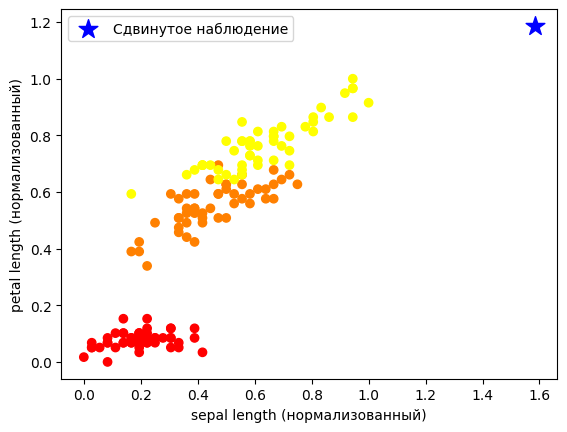

In [ ]:
# Сдвигаем новое наблюдение за пределы области данных
observation_new_outside = [[10, 8]]

observation_new_scaled_outside = scaler.transform(observation_new_outside)


print("Нормализованные значения для нового наблюдения (сдвинутого за пределы):", observation_new_scaled_outside)


plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')
plt.scatter(observation_new_scaled_outside[0][0], observation_new_scaled_outside[0][1], marker='*', color='b', s=200, label='Сдвинутое наблюдение')

plt.xlabel('sepal length (нормализованный)')
plt.ylabel('petal length (нормализованный)')
plt.legend()
plt.show()


## Поэкспериментируйте с разными метриками расстояния. Визуализируйте ближайших соседей нового объекта при разных метриках расстояния.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/valida

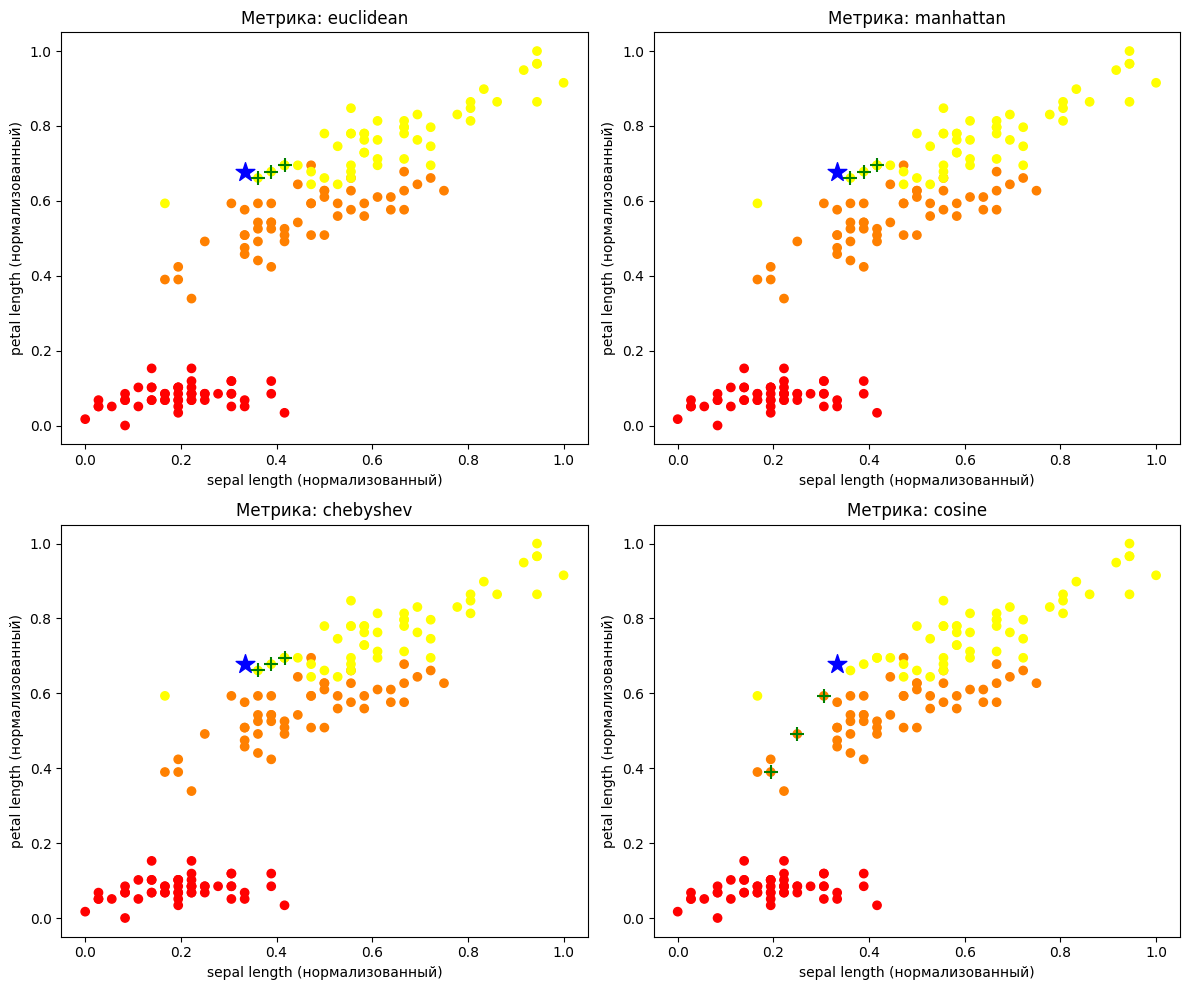

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances_argmin_min

observation_new = [[5.5, 5]]

metrics = ['euclidean', 'manhattan', 'chebyshev', 'cosine']


plt.figure(figsize=(12, 10))

# Проходим по каждой метрике
for i, metric in enumerate(metrics):
    # Обучаем KNN с текущей метрикой
    knn = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn.fit(X_scaled, y)

    # Найдём ближайших соседей для нового наблюдения
    distances, indices = knn.kneighbors(scaler.transform(observation_new))

    plt.subplot(2, 2, i+1)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn', label='Данные')

    plt.scatter(scaler.transform(observation_new)[0][0], scaler.transform(observation_new)[0][1], marker='*', color='blue', s=200, label='Новое наблюдение')


    for idx in indices[0]:
        plt.scatter(X_scaled[idx, 0], X_scaled[idx, 1], marker='+', color='green', s=100, label='Соседи' if idx == indices[0][0] else "")

    plt.title(f"Метрика: {metric}")
    plt.xlabel('sepal length (нормализованный)')
    plt.ylabel('petal length (нормализованный)')

plt.tight_layout()
plt.show()


## Обучите модель на полном датасете. Сравните ее эффективность с описанной в методических указаниях. Попробуйте разные значения k (1 и 9).

Матрица ошибок:


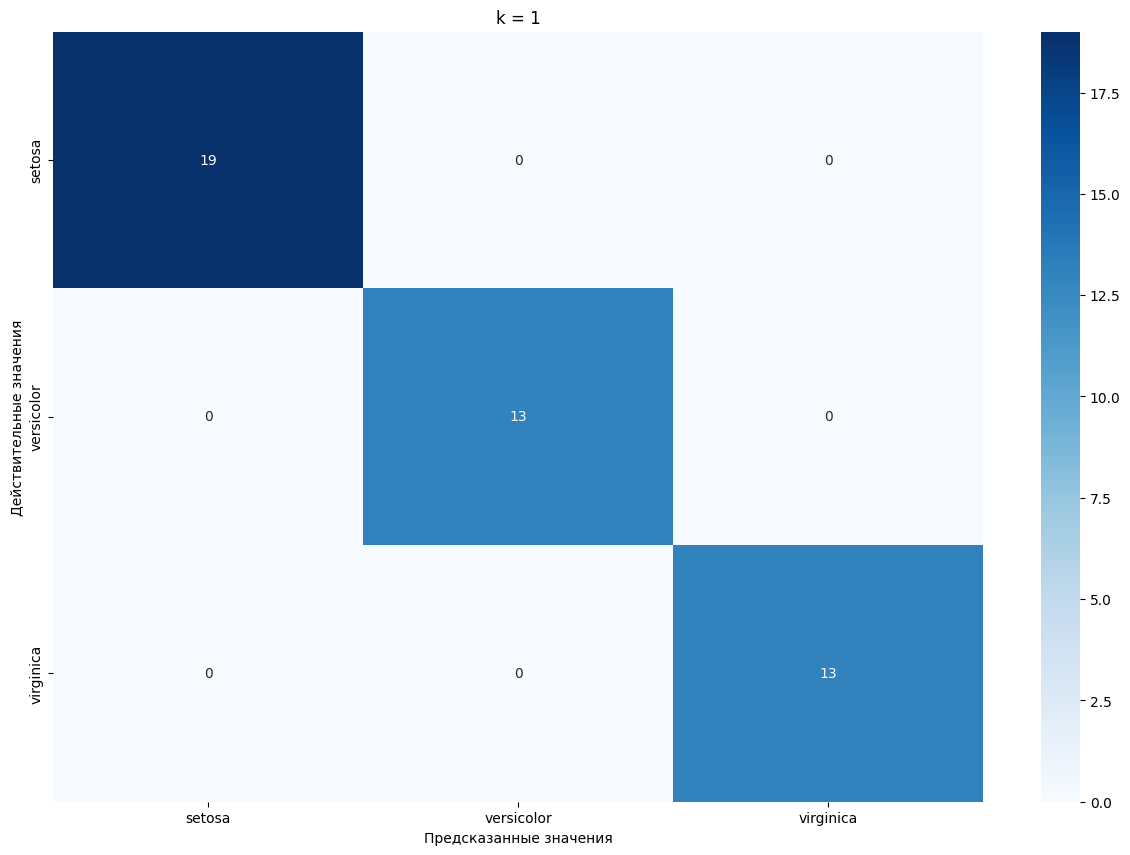

Матрица ошибок:


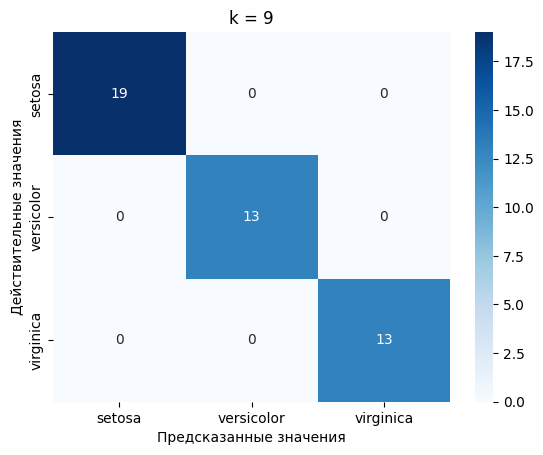

In [ ]:
iris = load_iris()
features = iris.data
target = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = [1, 9]

plt.figure(figsize=(15, 10))


for i, k in enumerate(k_values):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)


    print("Матрица ошибок:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f"k = {k}")
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Действительные значения')
    plt.show()



## Попробуйте в модели на полном датасете взвешенный алгоритм (аргумент weights объекта KNeighborsClassifier). Сравние его точность с равномерным вариантом.

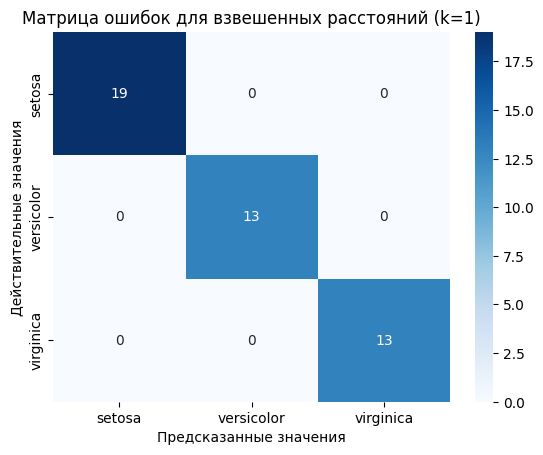

In [ ]:
iris = load_iris()
features = iris.data
target = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучаем модель с взвешенными расстояниями
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='distance')
knn_distance.fit(X_train_scaled, y_train)
y_pred_distance = knn_distance.predict(X_test_scaled)


cm_distance = confusion_matrix(y_test, y_pred_distance)
sns.heatmap(cm_distance, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Матрица ошибок для взвешенных расстояний (k=1)")
plt.xlabel('Предсказанные значения')
plt.ylabel('Действительные значения')
plt.show()


## Постройте график точности (accuracy) модели в зависимости от значения k. Сделайте вывод.

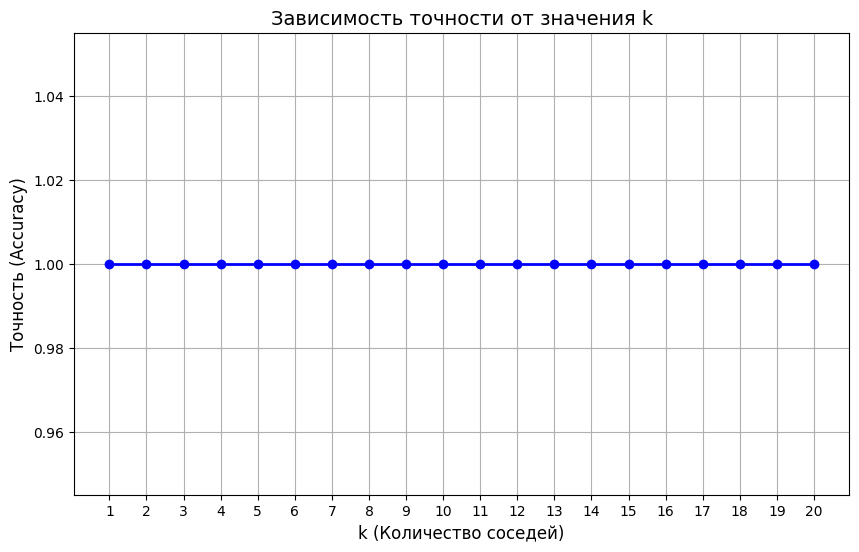

In [ ]:
k_values = range(1, 21)

accuracy_scores = []


for k in k_values:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)


plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title("Зависимость точности от значения k", fontsize=14)
plt.xlabel("k (Количество соседей)", fontsize=12)
plt.ylabel("Точность (Accuracy)", fontsize=12)
plt.xticks(k_values)  # Показываем значения k по оси x
plt.grid(True)
plt.show()


## Выберите датасет и постройте регрессию при помощи метода ближайших соседей.

In [ ]:

from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Используем k=5
knn_regressor.fit(X_train_scaled, y_train)

y_pred = knn_regressor.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Печатаем результаты
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")



Mean Squared Error: 0.43
R2 Score: 0.67
